In [1]:
import time

import ambulance_game as abg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lambda_1 = 5
lambda_2 = 5
mu = 3
num_of_servers = 4
threshold = 10
system_capacity = 15
buffer_capacity = 15

In [3]:
waiting_formulas = (
    abg.markov.mean_waiting_time_formula_using_recursive_approach,
    abg.markov.mean_waiting_time_formula_using_direct_approach,
    abg.markov.mean_waiting_time_formula_using_closed_form_approach,
)

## Run all three formulas for some paramteres

In [4]:
for selected_waiting_formula in waiting_formulas:
    print(selected_waiting_formula.__name__, end=":\t ")
    print(
        abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
            lambda_1=lambda_1,
            lambda_2=lambda_2,
            mu=mu,
            num_of_servers=num_of_servers,
            threshold=threshold,
            system_capacity=system_capacity,
            buffer_capacity=buffer_capacity,
            class_type=None,
            waiting_formula=selected_waiting_formula,
        ),
    )

mean_waiting_time_formula_using_recursive_approach:	 0.22949130146059038
mean_waiting_time_formula_using_direct_approach:	 0.22949130146059038
mean_waiting_time_formula_using_closed_form_approach:	 0.2294913014605903


# Run for diferent values of $N$

In [17]:
num_of_trials = 10
start, end = 10, 20
system_capapcity_space = np.linspace(start, end, end - start + 1, dtype=int)

In [13]:
all_durations_sys = []
for system_capacity_i in system_capapcity_space:
    waiting_times = [0, 0, 0]
    durations = [0, 0, 0]
    for i, selected_waiting_formula in enumerate(waiting_formulas):
        for _ in range(num_of_trials):
            start_time = time.time()
            waiting_times[i] = abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
                lambda_1=lambda_1,
                lambda_2=lambda_2,
                mu=mu,
                num_of_servers=num_of_servers,
                threshold=threshold,
                system_capacity=system_capacity_i,
                buffer_capacity=buffer_capacity,
                class_type=None,
                waiting_formula=selected_waiting_formula,
            )
            end_time = time.time()
            durations[i] += end_time - start_time
        durations[i] /= num_of_trials
    if not np.allclose(waiting_times[0], waiting_times[1], waiting_times[2]):
        print(system_capacity_i, end="\t")
        print(waiting_times)
    all_durations_sys.append(durations)

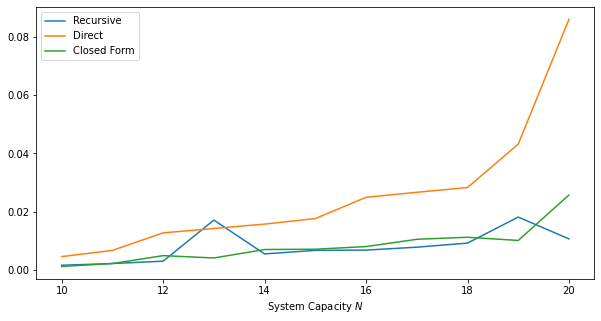

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(
    system_capapcity_space, np.array(all_durations_sys)[:, 0], label="Recursive"
)
plt.plot(
    system_capapcity_space, np.array(all_durations_sys)[:, 1], label="Direct"
)
plt.plot(
    system_capapcity_space, np.array(all_durations_sys)[:, 2], label="Closed Form"
)
plt.xlabel("System Capacity $N$")
plt.legend()
plt.savefig("algorithm_duration_over_N.png", transparent=True)

# Run for diferent values of $M$

In [18]:
num_of_trials = 10
start, end = 10, 20
buffer_capapcity_space = np.linspace(start, end, end - start + 1, dtype=int)

In [36]:
all_durations_buf = []
for buffer_capacity_i in buffer_capapcity_space:
    waiting_times = [0, 0, 0]
    durations = [0, 0, 0]
    for i, selected_waiting_formula in enumerate(waiting_formulas):
        for _ in range(num_of_trials):
            start_time = time.time()
            waiting_times[i] = abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
                lambda_1=lambda_1,
                lambda_2=lambda_2,
                mu=mu,
                num_of_servers=num_of_servers,
                threshold=threshold,
                system_capacity=system_capacity,
                buffer_capacity=buffer_capacity_i,
                class_type=None,
                waiting_formula=selected_waiting_formula,
            )
            end_time = time.time()
            durations[i] += end_time - start_time
        durations[i] /= num_of_trials
    if not np.allclose(waiting_times[0], waiting_times[1], waiting_times[2]):
        print(system_capacity, end="\t")
        print(waiting_times)
    all_durations_buf.append(durations)

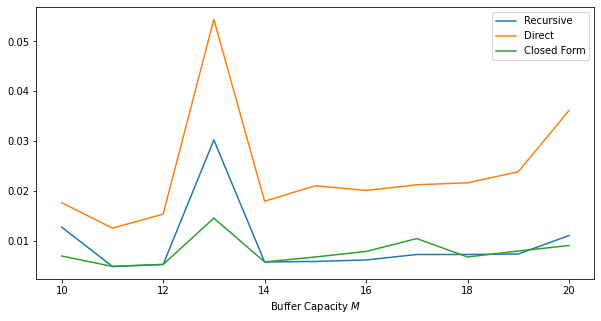

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(
    buffer_capapcity_space, np.array(all_durations_buf)[:, 0], label="Recursive"
)
plt.plot(
    buffer_capapcity_space, np.array(all_durations_buf)[:, 1], label="Direct"
)
plt.plot(
    buffer_capapcity_space, np.array(all_durations_buf)[:, 2], label="Closed Form"
)
plt.xlabel("Buffer Capacity $M$")
plt.legend()
plt.savefig("algorithm_duration_over_M.png", transparent=True)